# FIT5201_2018S2 Assignment 1 - Section A - Question 2

- <font color='blue'>**Student Id**</font>: 27771539
- <font color='blue'>**Student Name**</font>: Chuangfu Xie
- <font color='blue'>**Packages in use**</font>:
    - `repr`: Provide more control on graphical presentation
    - `ggplot2`: Data visualization package
    - `caret`: Provide tools for classification and regression training

## 0. Import packages:

In [1]:
library(repr)
library(ggplot2)
library(caret)

Loading required package: lattice


## 1. Implement L-fold Cross Validation:

### 1.1 Load CSVs

In [2]:
train <- read.csv("./datasets/Task1A_train.csv")

### 1.2 Modified KNN

In [3]:
knn <- function(train.data, train.label, test.data, K=3){
    # get length
    train.len <- nrow(train.data); test.len <- nrow(test.data)
    
    # Use 'Manhattan' distance
    temp <- as.matrix(dist(rbind(test.data, train.data), method = 'manhattan'))
    dist <- temp[1:test.len, (test.len+1):(test.len + train.len)]
    
    for (i in 1:test.len){
        # find its K nearest neighbours
        sorted_dist_each_row <- sort(dist[i,], index.return = TRUE)
        # get index of its knn
        nn_index <- as.data.frame(sorted_dist_each_row)[1:K,2]
        # get the mean of its knn target value and assign
        test.data$y[i] <- mean(train.label[nn_index])
    }
    return (test.data)
}

### 1.2 CV function

In [4]:
cv <- function(train.data, train.label, numFold=10){
    # get indice of test data points in different folds
    folds <- createFolds(train.data$x1, numFold, list = T)
    #initialise empty for recording
    results <- data.frame('K'=c(1:20), 'AvgError' = rep(0,20)) 
    for (k in 1:20){
        errors = data.frame('folds'=c(1:10), 'error'=rep(0,10))
        for (i in 1:10){
            tr.index <- folds[[i]] # get kth fold indice
            #get test dataset
            data.ts <- train.data[tr.index,]
            #get train dataset
            data.tr <- train.data[-tr.index,]
            #get train.label
            data.tr.label <- train.label[-tr.index,]
            #run KNN
            pred <- knn(data.tr, data.tr.label, data.ts, k)
            error <- sum((train.label[tr.index,] - pred[,2])**2)
            errors[i, 'error'] <- error
        }
        avgerror <- mean(errors$error)
        # store result
        results[k, 'AvgError'] <- avgerror
    }
    return(results)
}

## 2. Run 10-fold CV with different K (1~20) 

### 2.1 Run the codes

In [7]:
train.data <- train
train.data[,2] <- 0
train.label <- as.matrix(train[,2])
results <- cv(train.data, train.label, 10)
optimal <- results[which.min(results$AvgError),]

### 2.2 Plotting results

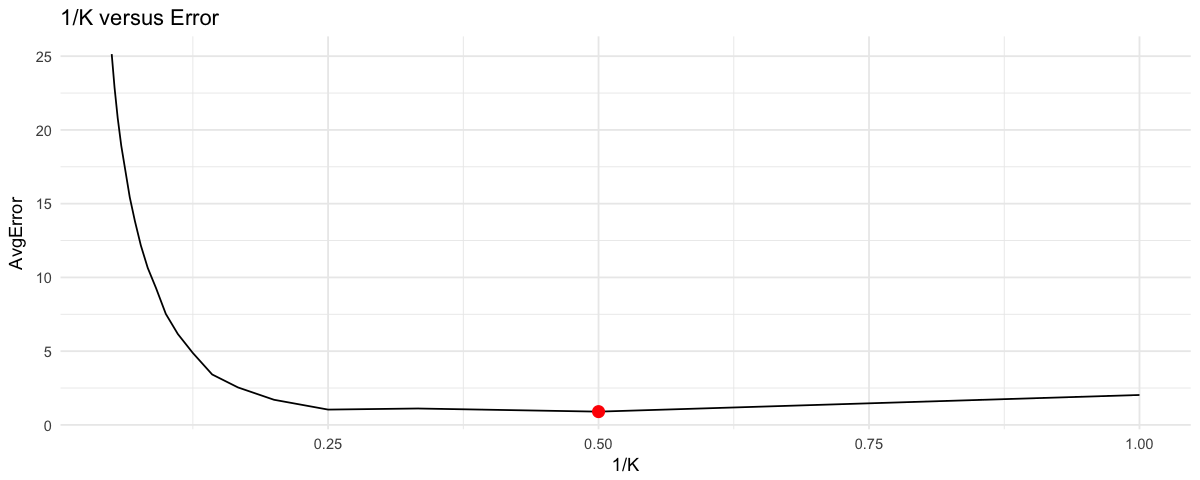

In [8]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data=results, aes(x=1/K, y=AvgError)) + geom_line() + theme_minimal() + 
    ggtitle("1/K versus Error") + geom_point(data=optimal, aes(x=1/K,y=AvgError), color='red', size=3)

## 3. Report

From above plotting, we can find that the optimal $K$ reside at where the sum of square error reaches its minimal. Compared to what we have in question 1, the optimal $K$ we get is significantly smaller. The reason behind is mainly becasue L-fold CV meets 3 essential requirements for training the model:
1. It trains the model on a large portion of the dataset to capture the underlying trend in the data, which yields low bias.
2. At each run, it iterates on using different data for testing the effectiveness of the model. In this way, the estimation get less influenced by outliers in the dataset.
3. By randomly picking testing dataset, it changes the distribution of both the training and testing datasets, which helps in validating the model effectiveness properly.